In [24]:
import numpy as np
import pandas as pd

import xlrd
import os
import seaborn as sns
import time
import warnings
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
#import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.metrics import confusion_matrix

# Import required libraries
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# import required libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/home/sarah/Phase3/Phase3 Project/Data/data-tz.csv", index_col=0)

In [3]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [4]:
#Dropping columns  that are irrelavant
data1= df.drop(columns  = ['id','amount_tsh',  'num_private', 'date_recorded', 
          'quantity_group', 'recorded_by','payment_type', 
          'waterpoint_type_group',  'subvillage', 'wpt_name',
            'funder', 'installer', 'ward'], axis = 1)
data1.head()

,gps_height,longitude,latitude,basin,region,region_code,district_code,lga,population,public_meeting,...,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group
0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,Ludewa,109,True,...,user-group,pay annually,soft,good,enough,spring,spring,groundwater,communal standpipe,functional
1,1399,34.698766,-2.147466,Lake Victoria,Mara,20,2,Serengeti,280,False,...,user-group,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional
2,686,37.460664,-3.821329,Pangani,Manyara,21,4,Simanjiro,250,True,...,user-group,pay per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,functional
3,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,58,True,...,user-group,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,non functional
4,0,31.130847,-1.825359,Lake Victoria,Kagera,18,1,Karagwe,0,True,...,other,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional


In [5]:
data1.columns

Index(['gps_height', 'longitude', 'latitude', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type',
       'status_group'],
      dtype='object')

### Convert Target variable to Numerical variable

In [8]:
target_variable = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
data1['status_group'] = data1['status_group'].replace(target_variable)

In [9]:
# look at the values count in status group
data1.status_group.value_counts()

0    32054
2    22659
1     4316
Name: status_group, dtype: int64

### Converting boolean of pubblic meeting and permit to 0 and 1

In [10]:
#convert True/False in public meeting column to 0-1
data1['public_meeting'] = data1['public_meeting'].astype(bool).astype(int)
data1['permit'] = data1['permit'].astype(bool).astype(int)

### Convert Target Ternary to Target Binary classes

In [11]:
# convert ternary classes to binary class
status_group_dict = {0:1, 1: 1, 2 : 0}
data1['status_group'] = data1['status_group'].replace(status_group_dict )

In [12]:
#print the status group value count
data1['status_group'].value_counts()

1    36370
0    22659
Name: status_group, dtype: int64

### Creating a pipeline for data preprocessing for the model

In [14]:
# separating target feature from data
X =data1.drop(columns = ['status_group'])
y =data1['status_group']

In [15]:
#split the train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print('Training set: ', X_train.shape, y_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)

Training set:  (44271, 26) (44271,)
Testing set:  (14758, 26) (14758,)


In [17]:
# Transform numeric features to categories using a scaler
numeric_variables=X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',RobustScaler())])
# Transform categorical features to numeric using an encoder
categorical_variables=X_train.select_dtypes(include=['object','category']).columns
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])
    
# getting together our scaler and encoder with preprocessor
preprocessor=ColumnTransformer(transformers=[
    ('num',numeric_transformer,numeric_variables),
    ('cat',categorical_transformer,categorical_variables)])

## Model 1

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=60,
                                                            random_state=42, 
                                                            n_jobs=-1,
                                                            class_weight='balanced'))])
# fit the model
rf.fit(X_train, y_train) 
 
# make predictions on training set
y_pred = rf.predict(X_train)

# make predictions on test set
y_pred_test = rf.predict(X_test)

print("Accuracy:")
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.9985091820830793
TEST: 0.8490310340154492

Balanced Accuracy:
TRAIN: 0.998340927245063
TEST: 0.8357205263782161


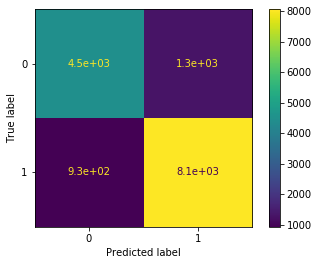

In [21]:
#confusion matrix
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

#ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [26]:
#finding 
scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')
print(scores.mean())

0.9161402036240712


In [27]:
# an empty data frame to see all results
df_results = pd.DataFrame(columns=["Model", "Scaler",'Encoder',
                                   'roc_auc score ']) 

In [29]:
df_results = df_results.append({       
     "Model": 'RandomForest' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'OneHotEncoder',
               'roc_auc score ' :0.9161402036240712
                    }, ignore_index=True)

In [32]:
# Delete a single column from the DataFrame
df_results = df_results.drop(labels=0, axis=0)

In [33]:
df_results

,Model,Scaler,Encoder,roc_auc score
1,RandomForest,RobustScaler,OneHotEncoder,0.91614


## Model 2

### Logistic 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score

lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(class_weight = 'balanced',
                                                        solver = 'lbfgs', 
                                                        random_state=42))])

# fit the model
lr.fit(X_train,y_train)  

# make predictions on training set
y_pred = lr.predict(X_train)

# make predictions on test set
y_pred_test = lr.predict(X_test)

print("Accuracy:")
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.7972261751485171
TEST: 0.7935357094457244

Balanced Accuracy:
TRAIN: 0.7843356153733532
TEST: 0.7816912856975176


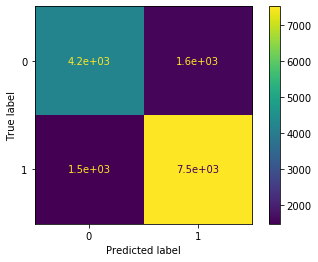

In [39]:
#confusion matrix
plot_confusion_matrix(lr, X_test, y_test)  
plt.show()

In [40]:
#finding 
scores = cross_val_score(lr, X, y, cv=5, scoring='roc_auc')
print(scores.mean())

0.8615830476256223


In [41]:
# an empty data frame to see all results
df_results = pd.DataFrame(columns=["Model", "Scaler",'Encoder',
                                   'roc_auc score ']) 

In [42]:
df_results = df_results.append({       
     "Model": 'RandomForest' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'OneHotEncoder',
               'roc_auc score ' :0.8615830476256223
                    }, ignore_index=True)

In [43]:
df_results

,Model,Scaler,Encoder,roc_auc score
0,RandomForest,RobustScaler,OneHotEncoder,0.861583


## Model 3

### K Nearest Neighbours

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier(metric='manhattan',
                                                          n_neighbors=7,
                                                          weights='distance'))])

# fit the model
knn.fit(X_train,y_train)  

# make predictions on training set
y_pred = lr.predict(X_train)

# make predictions on test set
y_pred_test = lr.predict(X_test)

print("Accuracy:")
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.7972261751485171
TEST: 0.7935357094457244

Balanced Accuracy:
TRAIN: 0.7843356153733532
TEST: 0.7816912856975176


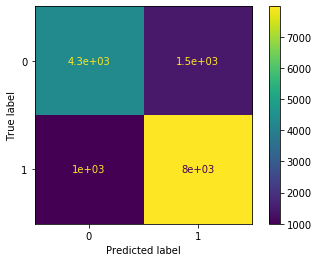

In [46]:
#confusion matrix
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()

In [47]:
#finding 
scores = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')
print(scores.mean())

0.8945572641915789


In [48]:
# an empty data frame to see all results
df_results = pd.DataFrame(columns=["Model", "Scaler",'Encoder',
                                   'roc_auc score '])

In [49]:
df_results = df_results.append({       
     "Model": 'RandomForest' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'OneHotEncoder',
               'roc_auc score ' :0.8945572641915789
                    }, ignore_index=True)

In [50]:
df_results

,Model,Scaler,Encoder,roc_auc score
0,RandomForest,RobustScaler,OneHotEncoder,0.894557


## Model 4

### Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(criterion='entropy', 
                                                            max_depth=4, 
                                                            min_samples_leaf=5, 
                                                            random_state=42, 
                                                            class_weight='balanced'))])

# fit the model
decision_tree.fit(X_train,y_train)  

# make predictions on training set
y_pred = lr.predict(X_train)

# make predictions on test set
y_pred_test = lr.predict(X_test)

print("Accuracy:")
print(f"TRAIN: {accuracy_score(y_train, y_pred)}")
print(f"TEST: {accuracy_score(y_test, y_pred_test)}")

print("\nBalanced Accuracy:")
print(f"TRAIN: {balanced_accuracy_score(y_train, y_pred)}")
print(f"TEST: {balanced_accuracy_score(y_test, y_pred_test)}")

Accuracy:
TRAIN: 0.7972261751485171
TEST: 0.7935357094457244

Balanced Accuracy:
TRAIN: 0.7843356153733532
TEST: 0.7816912856975176


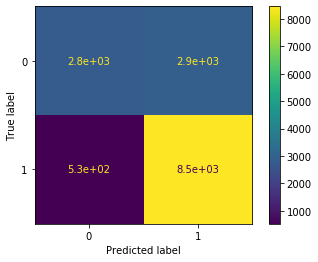

In [53]:
#confusion matrix
plot_confusion_matrix(decision_tree, X_test, y_test)  
plt.show()

In [57]:
#finding 
scores = cross_val_score(decision_tree, X, y, cv=5, scoring='roc_auc')
print(scores.mean())

0.7638717027066853


In [58]:
# an empty data frame to see all results
df_results = pd.DataFrame(columns=["Model", "Scaler",'Encoder',
                                   'roc_auc score '])

In [59]:
df_results = df_results.append({       
     "Model": 'RandomForest' ,
      "Scaler": 'RobustScaler' , 
       'Encoder' : 'OneHotEncoder',
               'roc_auc score ' :0.7638717027066853
                    }, ignore_index=True)

In [60]:
df_results

,Model,Scaler,Encoder,roc_auc score
0,RandomForest,RobustScaler,OneHotEncoder,0.763872


## Conclusion

#### findings